<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Libraries

In [1]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures

# Class Imbalance
from imblearn.over_sampling import SMOTE

# CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix


warnings.filterwarnings(action="ignore")
%matplotlib inline

## Loading Data

In [3]:
student_performance = pd.read_csv('/content/StudentsPerformance.csv')
student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
student_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
# Get value counts of categorical columns
categorical_columns = student_performance.select_dtypes(include=['object'])

# Display value counts for each categorical column
for column in categorical_columns.columns:
    print(f"Value counts for {column}:")
    print(categorical_columns[column].value_counts())
    print()

Value counts for gender:
gender
female    518
male      482
Name: count, dtype: int64

Value counts for race/ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Value counts for parental level of education:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Value counts for lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Value counts for test preparation course:
test preparation course
none         642
completed    358
Name: count, dtype: int64



## Exploratoty Data Analysis

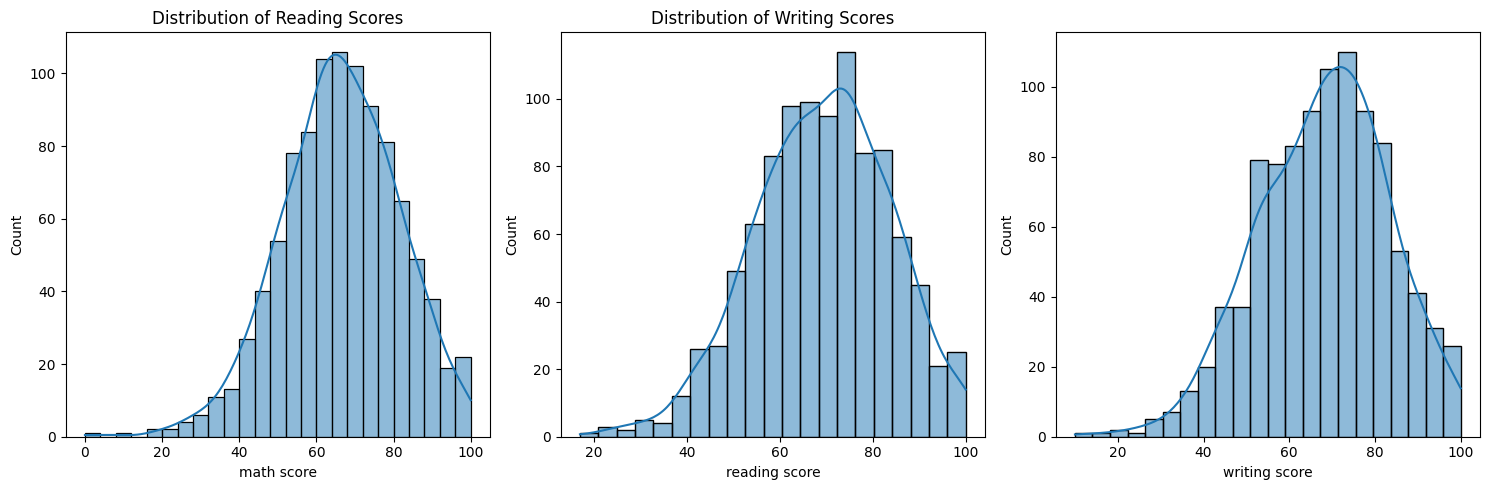

In [15]:
# Set up the figure and axes for side-by-side plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Distribution of math scores
sns.histplot(student_performance['math score'], kde=True, ax=ax1)
ax1.set_title('Distribution of Math Scores')

# Distribution of reading scores
sns.histplot(student_performance['reading score'], kde=True, ax=ax2)
ax1.set_title('Distribution of Reading Scores')

# Distribution of writing scores
sns.histplot(student_performance['writing score'], kde=True, ax=ax3)
ax2.set_title('Distribution of Writing Scores')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## **ENCODING**

In [17]:
student_performance = pd.get_dummies(student_performance, drop_first=True)

In [18]:
student_performance.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


## **Machine Learning**

In [19]:
# Define features and target
X = student_performance.drop(['math score'], axis=1)
y = student_performance['math score']

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

# Train a model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Evaluate the model
print('Model R2 score:', model.score(X_test, y_test))

Model R2 score: 0.8804332983749565
